In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [194]:
data = pd.read_csv('BBDD_hospitalv2.csv')

 Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento.

In [196]:
data['TIPO DE CULTIVO'].value_counts()

TIPO DE CULTIVO
NO                          554
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64

In [178]:
data = data[['EDAD','DIABETES','VOLUMEN PROSTATICO','ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA','BIOPSIA','FIEBRE','ITU','AGENTE AISLADO','HOSPITALIZACION']]

#data = data[['EDAD','DIABETES','HOSPITALIZACION']]

'biopsia prostática, fiebre, infección urinaria o sepsis'

data

,EDAD,DIABETES,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,AGENTE AISLADO,HOSPITALIZACION
0,53,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,SI
1,56,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,SI
2,57,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,E.COLI,SI
3,56,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,SI
4,55,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,E.COLI,SI
...,...,...,...,...,...,...,...,...,...,...,...
557,78,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,NO,NO,NEG,NO,NO,NO,NO
558,67,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO
559,64,NO,SI,OTROS,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO
560,67,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO


In [179]:
y = data["HOSPITALIZACION"]


# Elimina la columna del DataFrame original


data.drop(columns=["HOSPITALIZACION"], inplace=True)



In [180]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# recordemos realizar con anterioridad el EDA, y tambien cambiar el nombre de la columna objetivo por y, para que el modelo lo detecte mejor

one = OneHotEncoder() #estanciamos la funcion

one.fit(data) #pasamos los parametros del dataframe para que sepa que tipo de caracteristicas tiene, ademas detecta la columa y como etiqueta

X = one.transform(data).toarray()

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [190]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree = clf.fit(X_train,y_train)

In [191]:
tree = clf.fit(X_train,y_train)

In [192]:
evaluacion = tree.predict(X_test)
    
score = accuracy_score(evaluacion,y_test)

score

0.9787234042553191

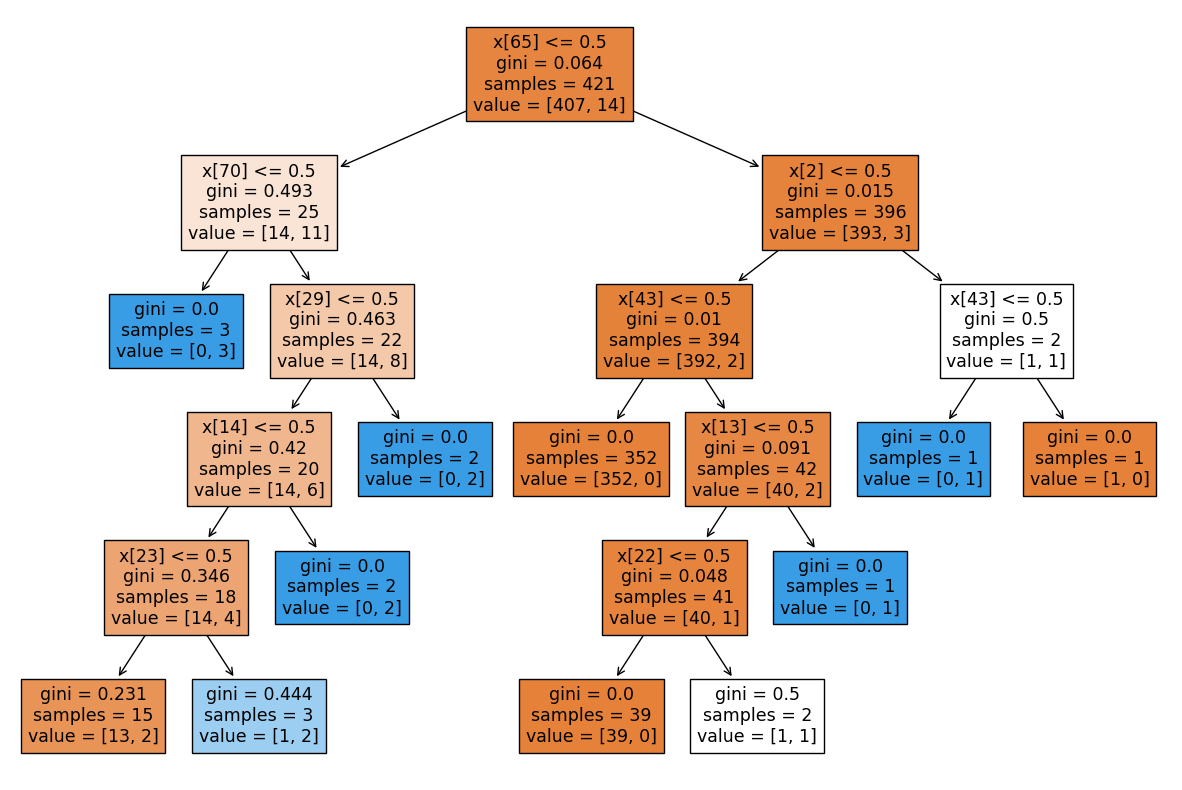

In [193]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus preferencias
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, feature_names=None, class_names=None)  # Puedes proporcionar nombres de características y clases si es necesario
plt.show()

In [189]:
# Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


# Hacer predicciones en la malla de puntos
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Crear un gráfico de la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=25, edgecolor='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 72 features as input.